In [31]:
# Animal Detection using CNN

In [32]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [33]:
import os
import matplotlib.image as mpimg

In [34]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
path = "./animal_dataset/"
classes = os.listdir(path)
classes

['Cat', 'Dog', 'elephant']

In [37]:
from tensorflow.keras.utils import to_categorical
# Create a dictionary to map animal names to integers
animal_to_int = {animal: index for index, animal in enumerate(classes)}
animal_to_int

{'Cat': 0, 'Dog': 1, 'elephant': 2}

In [38]:
# Create a dictionary to map animal names to integers
int_to_animal = {index: animal for index, animal in enumerate(classes)}
int_to_animal

{0: 'Cat', 1: 'Dog', 2: 'elephant'}

In [39]:
image_paths = []
animal_names = []
animal_name_as_int = []
for class_label in classes:
    for file_name in os.listdir(path + class_label):
        if os.path.getsize(path + class_label + "/" + file_name) > 400:
            image_paths.append(path + class_label + "/" + file_name)
            animal_names.append(class_label)
            animal_name_as_int.append(animal_to_int[class_label])
print(len(image_paths), len(animal_names), 'classes=', set(animal_names))

1011 1011 classes= {'elephant', 'Dog', 'Cat'}


In [40]:
image_paths = np.array(image_paths)
image_paths[:5]

array(['./animal_dataset/Cat/1.png', './animal_dataset/Cat/10.png',
       './animal_dataset/Cat/100.png', './animal_dataset/Cat/101.png',
       './animal_dataset/Cat/102.png'], dtype='<U33')

In [41]:
animal_names = np.array(animal_names)
animal_names[:5]

array(['Cat', 'Cat', 'Cat', 'Cat', 'Cat'], dtype='<U8')

In [42]:
animal_name_as_int = np.array(animal_name_as_int, dtype=int)
animal_name_as_int[:5]

array([0, 0, 0, 0, 0])

In [43]:
def show_images_from_paths(image_paths, labels):
    plt.figure(figsize=(50, 50))
    for i in range(len(image_paths)):
        sp = plt.subplot(1, len(image_paths), i + 1)
        sp.axis("off")
        
        img = mpimg.imread(image_paths[i])
        plt.imshow(img)
        plt.title(labels[i], fontsize=60)
    plt.show()

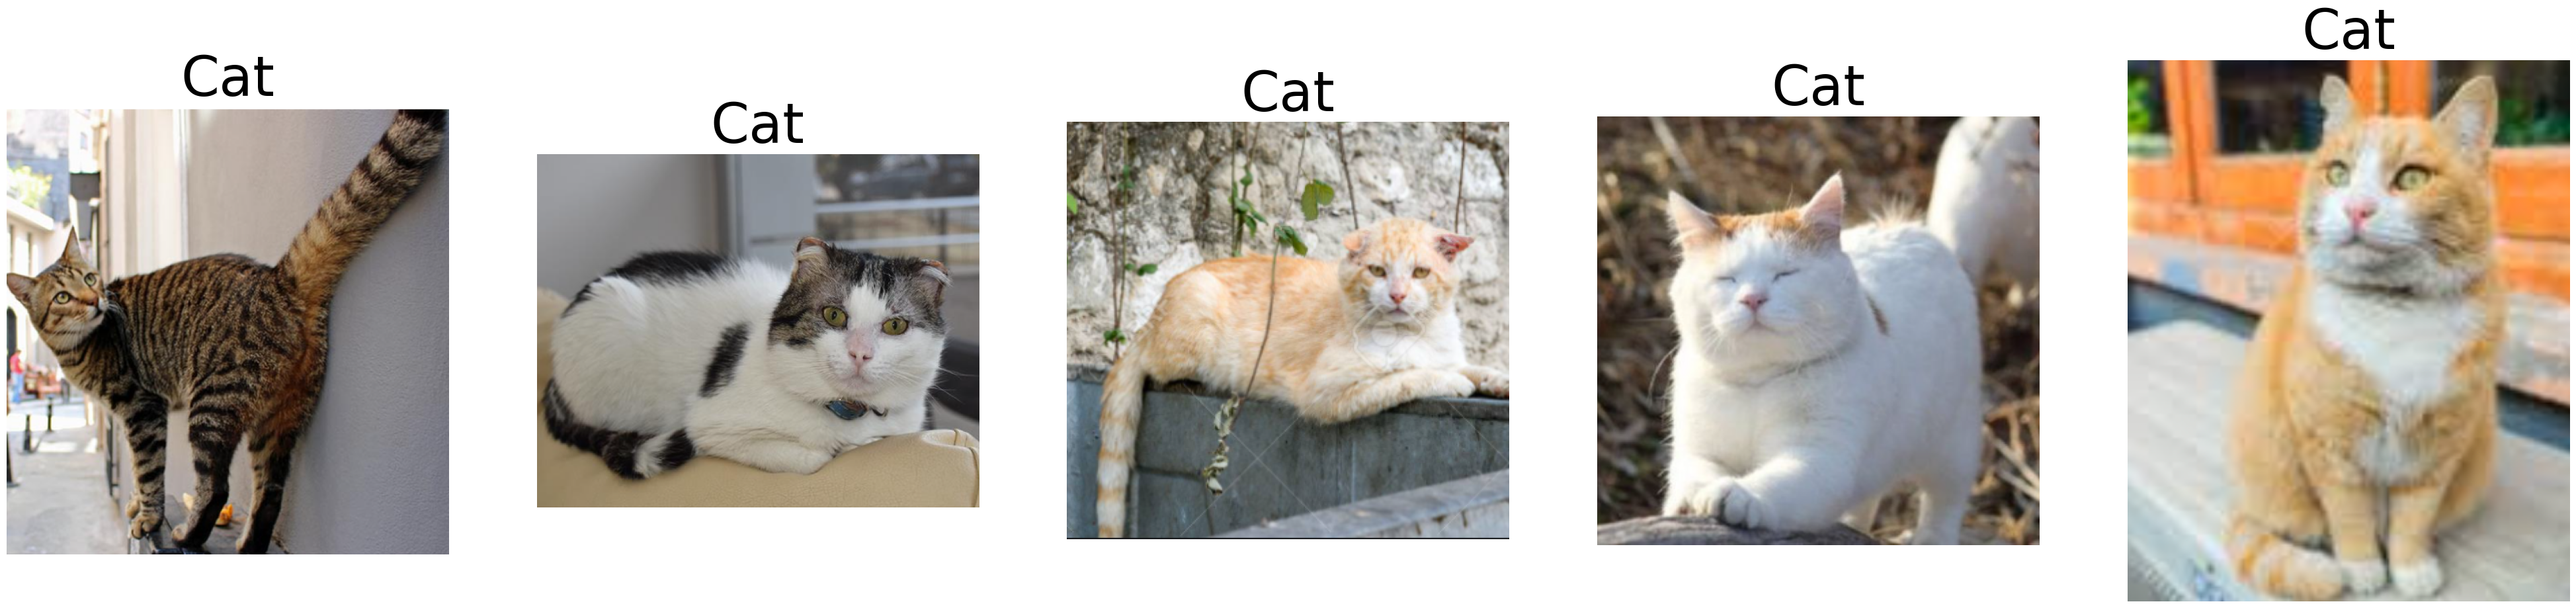

In [44]:
show_images_from_paths(image_paths[:5], animal_names[:5])

In [45]:
# Data Preparation for training
IMAGE_NUMS = len(image_paths)

In [46]:
# Convert all image to numpy arrays
# Load the image

from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preProcessImagePaths(imagePaths, IMAGE_NUMS):
    train_images_data = []
    for imageFile in imagePaths[:IMAGE_NUMS]:
#         print('Processing Image: ' + imageFile)
        # load image
        img = load_img(imageFile, target_size=(200, 200))  # You can adjust the target_size as needed
        # Convert the image to a NumPy array
        img_array = img_to_array(img)
        # Convert the color image to grayscale
        grayscale_image = np.mean(img_array, axis=-1)
        # Normalize the pixel values to [0, 1]
        img_array = grayscale_image / 255.0
        # append to train_images_data[]
        train_images_data.append(img_array)

    # convert list to np array
    train_images_data = np.array(train_images_data)
    return train_images_data

In [47]:
train_images_data = preProcessImagePaths(image_paths, IMAGE_NUMS)

In [48]:
type(animal_name_as_int)

numpy.ndarray

In [49]:
train_images_data[0]

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.9607843 , 0.9594771 , 0.95555556, ..., 0.15686275, 0.19869281,
        0.33071896],
       [0.9137255 , 0.9228758 , 0.9490196 , ..., 0.06797386, 0.12941177,
        0.324183  ],
       ...,
       [0.76209146, 0.7581699 , 0.75032675, ..., 0.44313726, 0.49411765,
        0.48366013],
       [0.76209146, 0.766013  , 0.75555557, ..., 0.4745098 , 0.4509804 ,
        0.49803922],
       [0.75947714, 0.77124184, 0.7647059 , ..., 0.46666667, 0.47058824,
        0.49411765]], dtype=float32)

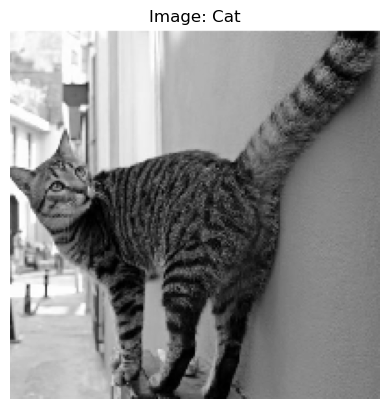

In [50]:
# Show Image
plt.subplot(1, 1, 1)
plt.imshow(train_images_data[0], cmap="gray")
plt.title(f"Image: {animal_names[0]}")
plt.axis("off")
plt.show()

In [51]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Spilt them into training and testing
train_images, test_images, train_labels, test_labels = train_test_split(train_images_data, animal_name_as_int[:IMAGE_NUMS], test_size=0.2, random_state=42)
len(train_images), len(test_images)

(808, 203)

In [52]:
def show_imagess(images, labels):
    i = 1
    for img, lab in zip(images, labels):
        plt.subplot(1, len(labels), i)
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {lab}") 
        plt.axis("off")
        i = i + 1
    plt.show()

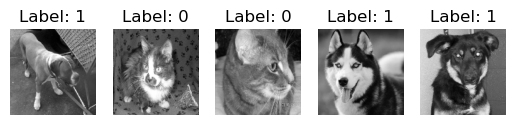

In [53]:
show_imagess(train_images[:5], train_labels[:5])

In [54]:
train_images[:2]

array([[[0.67058825, 0.7294118 , 0.7058824 , ..., 0.35816994,
         0.5294118 , 0.6862745 ],
        [0.7019608 , 0.627451  , 0.5647059 , ..., 0.48496732,
         0.5228758 , 0.4993464 ],
        [0.74509805, 0.6862745 , 0.5882353 , ..., 0.50980395,
         0.5633987 , 0.5281046 ],
        ...,
        [0.5281046 , 0.5124183 , 0.5124183 , ..., 0.19477125,
         0.25751632, 0.24183007],
        [0.52026147, 0.50065356, 0.49281046, ..., 0.19084968,
         0.21830066, 0.18692811],
        [0.5437909 , 0.52026147, 0.5163399 , ..., 0.18300654,
         0.24575163, 0.21045752]],

       [[0.34248367, 0.38039216, 0.34640524, ..., 0.26013073,
         0.26013073, 0.26013073],
        [0.41830066, 0.36601308, 0.38039216, ..., 0.27058825,
         0.27189544, 0.27189544],
        [0.4       , 0.40522876, 0.33986926, ..., 0.2627451 ,
         0.26797387, 0.26797387],
        ...,
        [0.4888889 , 0.4496732 , 0.31111112, ..., 0.3764706 ,
         0.37516338, 0.33202612],
        [0.5

In [55]:
test_images[:2]

array([[[0.58300656, 0.5764706 , 0.62352943, ..., 0.5228758 ,
         0.56078434, 0.5751634 ],
        [0.6183007 , 0.6183007 , 0.6       , ..., 0.48496732,
         0.5163399 , 0.5111111 ],
        [0.6313726 , 0.6156863 , 0.60784316, ..., 0.4745098 ,
         0.4627451 , 0.4614379 ],
        ...,
        [0.85751635, 0.8379085 , 0.85620916, ..., 0.8405229 ,
         0.9137255 , 0.9503268 ],
        [0.8535948 , 0.93202615, 0.80784315, ..., 0.9281046 ,
         0.94248366, 0.8849673 ],
        [0.8261438 , 0.7607843 , 0.73202616, ..., 0.9346405 ,
         0.82483655, 0.9150327 ]],

       [[0.7071895 , 0.67058825, 0.65882355, ..., 0.62222224,
         0.6183007 , 0.6496732 ],
        [0.6928105 , 0.68235296, 0.654902  , ..., 0.6326797 ,
         0.620915  , 0.648366  ],
        [0.627451  , 0.6379085 , 0.6379085 , ..., 0.654902  ,
         0.67058825, 0.6601307 ],
        ...,
        [0.5581699 , 0.5254902 , 0.57777774, ..., 0.65882355,
         0.6156863 , 0.24836601],
        [0.6

In [56]:
type(train_labels)

numpy.ndarray

In [57]:
train_images[0].shape

(200, 200)

In [58]:
# Model Architecture

model = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(112, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(112, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(212, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(len(classes), activation='softmax') # For multi-class classification
])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)       

In [60]:
# Plot model summary
keras.utils.plot_model(model,
                     show_shapes=True,
                     show_dtype=True,
                     show_layer_activations=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [61]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [63]:
# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=early_stopping)

Epoch 1/20


21/21 [==============================] - 40s 2s/step - loss: 1.3486 - accuracy: 0.3963 - val_loss: 1.1160 - val_accuracy: 0.5432
Epoch 2/20
21/21 [==============================] - 31s 1s/step - loss: 1.0853 - accuracy: 0.5046 - val_loss: 1.2165 - val_accuracy: 0.4691
Epoch 3/20
21/21 [==============================] - 29s 1s/step - loss: 0.9506 - accuracy: 0.5882 - val_loss: 0.9654 - val_accuracy: 0.5926
Epoch 4/20
21/21 [==============================] - 31s 1s/step - loss: 0.7849 - accuracy: 0.6703 - val_loss: 0.8540 - val_accuracy: 0.5432
Epoch 5/20
21/21 [==============================] - 31s 1s/step - loss: 0.6463 - accuracy: 0.7337 - val_loss: 0.9395 - val_accuracy: 0.5247
Epoch 6/20
21/21 [==============================] - 32s 2s/step - loss: 0.4921 - accuracy: 0.8127 - val_loss: 1.0689 - val_accuracy: 0.4383
Epoch 7/20
21/21 [==============================] - 33s 2s/step - loss: 0.4235 - accuracy: 0.8375 - val_loss: 0.8671 - val_accuracy: 0.5617
Epoch 7: early sto

In [64]:
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot()
# history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
# plt.show()

NameError: name 'history' is not defined

In [65]:
model.evaluate(test_images, test_labels)

7/7 [==============================] - 1s 193ms/step - loss: 0.9428 - accuracy: 0.5025


[0.9428377151489258, 0.5024630427360535]

In [66]:
model.save("animal-detection-model.h5")

In [67]:
y_predict = model.predict(test_images)

7/7 [==============================] - 2s 203ms/step


In [68]:
y_predict[200]

array([0.6191775 , 0.33618674, 0.0446358 ], dtype=float32)

In [71]:
count = 0
for i in range(len(test_images)):
    print(f"{test_labels[i]}: {y_predict[i].argmax()}")
    if test_labels[i] == y_predict[i].argmax():
        count += 1
count

1: 0
1: 0
1: 0
1: 0
1: 0
1: 0
1: 0
1: 1
0: 0
0: 0
0: 0
0: 0
1: 0
0: 0
1: 0
2: 1
1: 0
0: 0
0: 0
0: 0
1: 1
1: 1
0: 0
0: 1
1: 1
1: 0
1: 0
1: 0
1: 0
1: 0
0: 0
1: 0
0: 1
1: 0
1: 0
0: 1
1: 1
0: 0
0: 0
0: 0
0: 0
0: 1
0: 0
0: 1
0: 0
0: 0
1: 0
1: 0
1: 0
1: 0
1: 1
0: 0
0: 0
1: 0
1: 0
0: 0
1: 0
0: 1
0: 0
0: 1
0: 0
0: 1
0: 0
1: 0
1: 0
1: 0
0: 0
0: 0
1: 0
0: 0
0: 0
0: 0
0: 0
0: 0
1: 0
1: 1
1: 1
1: 0
0: 0
1: 0
0: 0
1: 0
0: 0
1: 0
0: 0
0: 0
1: 0
0: 0
0: 1
0: 0
0: 0
1: 0
1: 0
1: 0
1: 0
1: 1
0: 0
0: 0
0: 0
0: 1
1: 1
1: 0
0: 0
1: 0
0: 0
0: 0
1: 0
1: 0
1: 0
0: 1
1: 1
0: 0
1: 0
1: 1
1: 1
0: 1
1: 1
1: 0
0: 0
1: 0
0: 0
1: 0
1: 0
1: 0
0: 0
1: 0
0: 0
0: 0
0: 0
0: 0
1: 0
1: 0
1: 0
1: 0
2: 0
1: 1
0: 0
0: 0
1: 1
0: 0
0: 0
0: 0
0: 0
1: 0
2: 0
0: 0
1: 0
0: 0
0: 0
0: 0
1: 0
1: 0
1: 0
1: 0
1: 0
1: 0
1: 0
1: 0
0: 0
0: 0
0: 0
0: 0
1: 1
0: 0
0: 0
1: 0
1: 0
1: 0
0: 1
0: 0
0: 0
0: 1
1: 0
1: 1
0: 1
1: 0
1: 1
0: 0
1: 1
1: 0
0: 1
0: 0
1: 0
1: 0
0: 1
1: 0
1: 0
0: 0
0: 0
0: 0
0: 0
1: 0
1: 0
1: 0
0: 0
0: 0
0: 0
1: 0
1: 0
0: 0


102

In [72]:
# Model testing and prediction

In [74]:
from tensorflow.keras.models import load_model
model = load_model('animal-detection-model.h5')

In [83]:
from keras.preprocessing import image
test_image_path = ["./Animal_test/3.png", "./Animal_test/d1.png"]
test_image_data = preProcessImagePaths(test_image_path, len(test_image_path))

prediction = model.predict(test_image_data)

print(f"{int_to_animal[np.argmax(prediction[0])]}, {int_to_animal[np.argmax(prediction[1])]}")

1/1 [==============================] - 0s 69ms/step
Cat, Cat


In [75]:
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = np.reshape(image, (1, 28, 28, 1))
    return image

In [76]:
def predict_image(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions)
    return predicted_class

In [77]:
def show_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()